# Part 1) Load the data and make a datetime index.


In [142]:
## Preliminary Steps
# Importing libraries
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.ticker as mticks
import matplotlib.dates as mdates
# changing default figsize
plt.rcParams['figure.figsize']=[12,3]
# loading in data
df=pd.read_csv('/Users/oliver/Desktop/datasets/london_weather_MODIFIED - london_weather_MODIFIED.csv')
# creating datetime column
df['datetime']=pd.to_datetime(df['date'],format='%Y%m%d')
# setting as index
df=df.set_index('datetime')
display(df.info(),df.tail())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15341 entries, 1979-01-01 to 2020-12-31
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       14938 non-null  float64
 2   sunshine          14957 non-null  float64
 3   global_radiation  14939 non-null  float64
 4   max_temp          14951 non-null  float64
 5   mean_temp         14922 non-null  float64
 6   min_temp          14955 non-null  float64
 7   precipitation     14951 non-null  float64
 8   pressure          14953 non-null  float64
 9   snow_depth        13589 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.3 MB


None

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
datetime,,,,,,,,,,
2020-12-27,20201227,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN
2020-12-28,20201228,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN
2020-12-29,20201229,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN
2020-12-30,20201230,6.0,0.4,22.0,5.6,2.7,-0.1,0.0,100200.0,NaN
2020-12-31,20201231,7.0,1.3,34.0,1.5,-0.8,-3.1,0.0,100500.0,NaN


In [143]:
## filtering out required data
# keeping data from year 2000 and later
df=df.loc['2000':]
# keeping only select features
df=df[['precipitation','mean_temp','min_temp','max_temp','snow_depth']]
# previewing
display(df.info(),df.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7671 entries, 2000-01-01 to 2020-12-31
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   precipitation  7281 non-null   float64
 1   mean_temp      7252 non-null   float64
 2   min_temp       7285 non-null   float64
 3   max_temp       7281 non-null   float64
 4   snow_depth     5919 non-null   float64
dtypes: float64(5)
memory usage: 359.6 KB


None

,precipitation,mean_temp,min_temp,max_temp,snow_depth
datetime,,,,,
2000-01-01,0.0,7.0,4.9,10.8,0.0
2000-01-02,0.2,7.9,5.0,11.5,0.0
2000-01-03,6.0,9.4,7.2,9.5,0.0
2000-01-04,0.2,7.0,4.4,11.0,0.0
2000-01-05,0.8,6.4,1.9,10.8,0.0


In [144]:
# locating missing values
df.isna().sum()

precipitation     390
mean_temp         419
min_temp          386
max_temp          390
snow_depth       1752
dtype: int64

In [145]:
## Imputing missing values
df=df.interpolate(column=['precipitation','mean_temp','min_temp','max_temp','snow_temp'])
display(df.info,df.head())

<bound method DataFrame.info of             precipitation  mean_temp  min_temp  max_temp  snow_depth
datetime                                                            
2000-01-01            0.0        7.0       4.9      10.8         0.0
2000-01-02            0.2        7.9       5.0      11.5         0.0
2000-01-03            6.0        9.4       7.2       9.5         0.0
2000-01-04            0.2        7.0       4.4      11.0         0.0
2000-01-05            0.8        6.4       1.9      10.8         0.0
...                   ...        ...       ...       ...         ...
2020-12-27            2.0        7.5       7.6       7.5         0.0
2020-12-28            0.2        1.1      -1.3       3.6         0.0
2020-12-29            0.0        2.6       1.1       4.1         0.0
2020-12-30            0.0        2.7      -0.1       5.6         0.0
2020-12-31            0.0       -0.8      -3.1       1.5         0.0

[7671 rows x 5 columns]>

,precipitation,mean_temp,min_temp,max_temp,snow_depth
datetime,,,,,
2000-01-01,0.0,7.0,4.9,10.8,0.0
2000-01-02,0.2,7.9,5.0,11.5,0.0
2000-01-03,6.0,9.4,7.2,9.5,0.0
2000-01-04,0.2,7.0,4.4,11.0,0.0
2000-01-05,0.8,6.4,1.9,10.8,0.0


array([<AxesSubplot: xlabel='datetime'>, <AxesSubplot: xlabel='datetime'>,
       <AxesSubplot: xlabel='datetime'>, <AxesSubplot: xlabel='datetime'>,
       <AxesSubplot: xlabel='datetime'>], dtype=object)

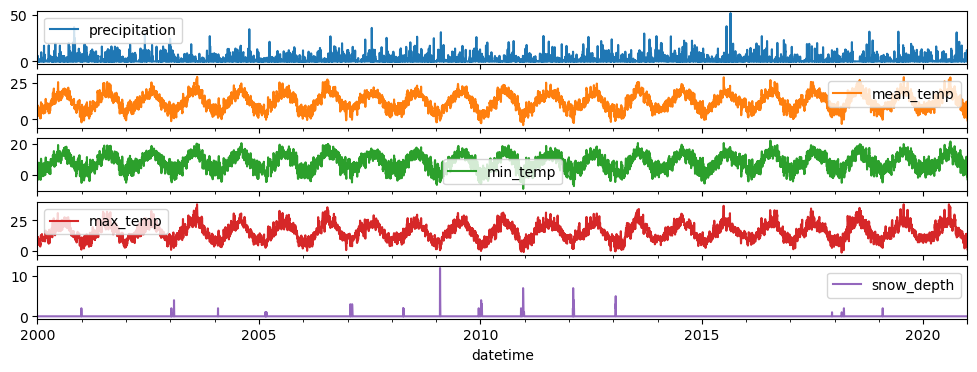

In [146]:
df.plot(figsize=[12,4],subplots=True)

In [147]:
df.isna().sum()

precipitation    0
mean_temp        0
min_temp         0
max_temp         0
snow_depth       0
dtype: int64

# Part 2) Answer the Questions with Visualizations (Using the Correct Frequency)


    Q1: What month had the most precipitation between 2000 through 2010?

Resample the data as Monthly frequency.

Find the date and corresponding value for the max precipitation.

Plot the feature and time period that corresponds to the question.

Make sure to meet the "Visualization Requirements" below!

Determine the date and value for the most precipitation (the max precipitation).

Add a vertical line at this date with a label that says the date (using date format: "April 2000") and the max precipitation value.

Make sure to add a legend so that your label is visible.


In [148]:
## resampling with monthly frequency
df=df.asfreq('M')
## Finding date of max precipitation
max_precip=df['precipitation'].idxmax()
max_precip

Timestamp('2014-01-31 00:00:00', freq='M')

In [149]:
## value of max precipitation
df.loc['2014-01-31 00:00:00','precipitation']

19.8

In [150]:
# creating locators:
# 3 month locator
month_loc=mdates.MonthLocator(interval=3)
# yearly locator
year_loc=mdates.YearLocator()
# yearly formator
year_fmt=mdates.DateFormatter('%Y')

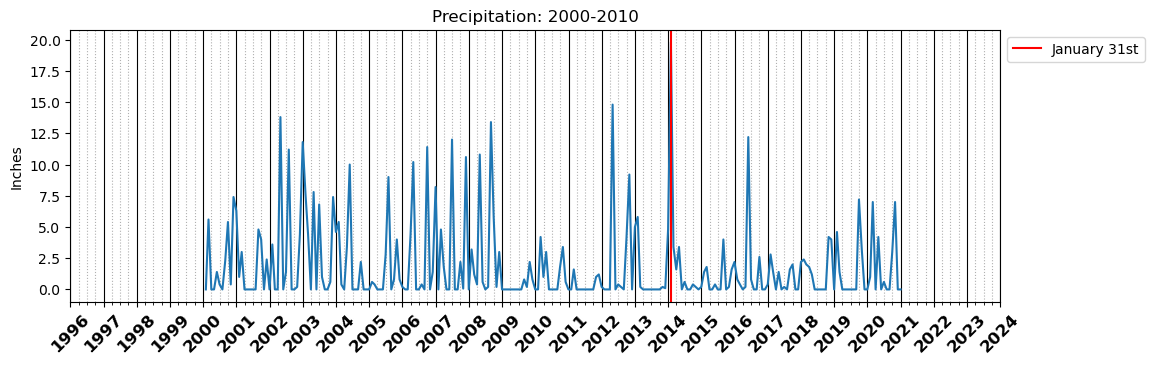

In [151]:
## Plotting  
fig,ax=plt.subplots(figsize=[12,4])
ax.plot(df['precipitation'].index,df['precipitation'].values)
ax.set_title('Precipitation: 2000-2010')
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), fontsize='large',fontweight='bold' )
# setting a y label
ax.set_ylabel('Inches')
# setting ticks
ax.xaxis.set_minor_locator(month_loc)
ax.xaxis.set_major_locator(year_loc)
ax.xaxis.set_major_formatter(year_fmt)
# setting grids
ax.grid(which='minor',axis='x',ls=":")
ax.grid(which='major',axis='x',color='k')
# rotating date names
fig.autofmt_xdate(rotation=45, ha='center')
# creating vline to mark max percipitation
plt.axvline(x = max_precip, color = 'r', label = 'January 31st')
# putting legend in upper left
plt.legend(bbox_to_anchor = (1, 1), loc = 'upper left');

January 31st of 2014 had the highest percipitation.

    Q2: Which year between 2000-2020 had the coolest average temperature?
Resample the data as Yearly frequency.

Plot the feature and time period that corresponds to the question.
Make sure to meet the "Visualization Requirements" below!
Determine the date and value for the lowest mean temp.
Add a vertical line at this date with a label that says the date (using date format: "2000") and the lowest mean temperature value.


In [152]:
# resampling with a yearly frequency
df=df.asfreq('Y')
# finding year with coolest average temperature
cool_mean_temp=df['mean_temp'].idxmin()
print(cool_mean_temp)
# Determining value
df.loc[cool_mean_temp,'mean_temp']

2008-12-31 00:00:00


-0.8

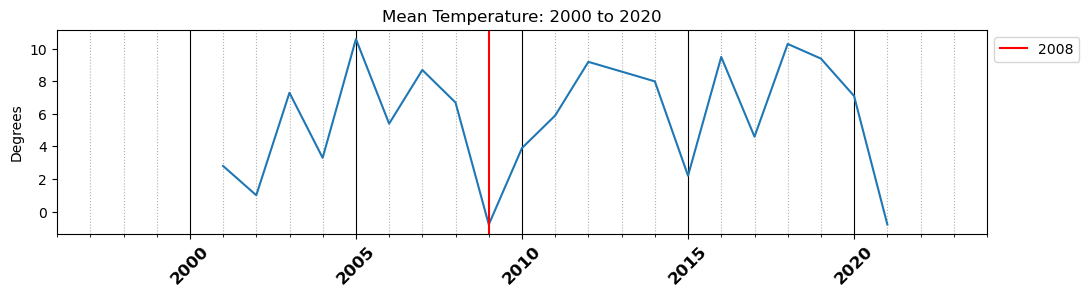

In [153]:
## Plotting 
# creating five yearlocator
loc_5year=mdates.YearLocator(5)
# Creating figure
fig, ax = plt.subplots(figsize=[12,3])
ax.plot(df['mean_temp'].index,df['mean_temp'].values,)
ax.set_title('Mean Temperature: 2000 to 2020')
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), fontsize='large',fontweight='bold' )
# setting a y label
ax.set_ylabel('Degrees')
# setting monthly and yearly ticks
ax.xaxis.set_minor_locator(year_loc)
ax.xaxis.set_major_locator(loc_5year)
ax.xaxis.set_major_formatter(year_fmt)
# creating grids
ax.grid(which='minor',axis='x',ls=":")
ax.grid(which='major',axis='x',color='k')
# rotating dates
fig.autofmt_xdate(rotation=45,ha='center')
# marking year with coolest average temps
plt.axvline(x = cool_mean_temp, color = 'r', label = '2008')
# plotting legend in upper left corner
plt.legend(bbox_to_anchor = (1, 1), loc = 'upper left');

2008 had the coolest average temperatures